# Project Assignment: Unsupervised Exploration of the Electric School Bus Adoption Dataset

In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.impute import KNNImputer
sns.set_theme(style="darkgrid")


# Context

<p> Electric school buses (ESBs) are an emerging technology aimed at reducing students’ exposure to 
diesel exhaust and cutting greenhouse gas emissions in school transportation. Adoption of ESBs is 
accelerating in the United States, but still represents a small fraction of the total school bus fleet. As 
of mid-2024, over 12,000 electric school buses have been committed (funded or ordered) across the 
country.This project will examine a dataset tracking ESB adoption nationwide. The dataset, 
compiled by the World Resources Institute (WRI), provides detailed information on which school 
districts are adopting electric buses and how the adoption process is unfolding. </p>
The focus here is on exploration and 
knowledge discovery

In [4]:
# Importing the data
# The dataset is available at: https://electricschoolbusinitiative.org/dataset-us-electric-school-bus-adoption  Version 8
stats_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=1)
district_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=2)
bus_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=3)
state_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=4)
utilities_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=5)
counties_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=6)
congredistrict_df = pd.read_excel("electric_school_bus_adoption_dataset_v8_2024-08Aug/ESB_adoption_dataset_v8_update_august_2024.xlsx",sheet_name=7)

In [5]:
# This dataset contains various statistics about electric school bus adoption in the US 
stats_df

,Value,June 2024,December 2023,June 2023,December 2022,September 2022,June 2022,March 2022,December 2021,June 2021
0,Total number of committed ESBs†,12174,8570,5982,5612,13053,12720,12275,1828.000000,1164.0
1,"Number of ESBs in ""awarded"" phase‡",6592,3453,3705,4214,11838,11616,11375,NaN,NaN
2,"Number of ESBs in ""ordered"" phase‡",2137,1348,992,427,369,337,300,NaN,NaN
3,"Number of ESBs in ""delivered"" phase‡",151,57,844,633,535,465,313,NaN,NaN
4,"Number of ESBs in ""operating"" phase‡",3294,3712,441,338,311,302,285,NaN,NaN
5,Phase not applicable*,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
6,Total number of districts with committed ESBs,NaN,1132,914,895,483,455,415,354.000000,258.0
7,Number of school districts or entities wi...,NaN,704,346,279,266,243,201,NaN,NaN
8,Total number of states or territories with com...,NaN,54,54,55,39,38,38,36.000000,33.0
9,"Average time taken for ESB to move from ""Award...",16 months,16 months,16 months,17 months,16 months,15 months,16 months,NaN,NaN


In [6]:
# This dataset contains information about school districts in the US that have or not yet adopted electric school buses
district_df

,0a. Has committed ESBs?,1a. State,1b. Local Education Agency (LEA) or entity name,1c. LEA ID,1d. Street address 1,1e. Street address 2,1f. City,1g. State,1h. ZIP code,1i. Website,...,5q. WRI Priority Outreach District (POD)?,6a. Has any expression of interest in ESBs?,6b. ARP 2021 waitlist position,6c. DERA school bus rebates 2020 waitlist position,6d. DERA school bus rebates 2021 waitlist position,6e. Applied for ESB funding but not awarded,6f. Member of Climate Mayors Electric Vehicle Purchasing Collaborative?,6g. School district sustainability commitment,6h. District contains Generation180 Solar School?,6i. Participating in Trust for Public Land's Active Community Schoolyard program?
0,no,ALABAMA,Alabama Youth Services,100002,1000 Industrial School Road,NaN,Mt Meigs,AL,36057.0,http://www.dys.alabama.gov/school-district.html,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,no,ALABAMA,Marshall County,100006,12380 US Highway 431 S,NaN,Guntersville,AL,35976.0,http://www.marshallk12.org,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,no,ALABAMA,Hoover City,100007,2810 Metropolitan Way,NaN,Hoover,AL,35243.0,http://www.hoovercityschools.net,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,no,ALABAMA,Madison City,100008,211 Celtic Drive,NaN,Madison,AL,35758.0,http://www.madisoncity.k12.al.us,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,no,ALABAMA,Al Inst Deaf And Blind,100009,205 E South Street,NaN,Talladega,AL,35160.0,http://www.aidb.org,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19511,no,WYOMING,Wyoming Department of Family Services,5680251,2300 Capitol Ave,NaN,Cheyenne,WY,82002.0,NaN,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19512,no,WYOMING,Youth Emergency Services Inc. - Administration...,5680252,905 N. Gurley Ave,NaN,Gillette,WY,82716.0,http://www.youthemergencyservices.org,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19513,no,WYOMING,Wyoming Behavioral Institute - Administration ...,5680253,2521 East 15th Street,NaN,Casper,WY,82609.0,http://wbihelp.com/,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19514,no,WYOMING,Rite of Passage,5680255,3304 EI-80 Service Rd,NaN,Cheyenne,WY,82009.0,http://riteofpassage.com/,...,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# This dataset contains information about electric school bus adoption in the states of the US, also including information about fleet, funding sources, 
# current status of buses, and other relevant information
bus_df

,1a. State,1b. LEA or entity name,1c. LEA ID,1f. City,2c. Fleet operator 1,2c. Fleet operator 2,3a. Number of ESBs committed,3n. Current status of bus,3o. Batch,3p. Quarter awarded,...,3z. Funding source 3,3aa. Agency administering funds 3,3z. Funding source 4,3aa. Agency administering funds 4,3ab. Dollar amount toward bus,3ac. Charging company,3ad. Charging funding source,3ae. Dollar amount toward charger,3af. Notes 1,3af. Notes 2
0,ALABAMA,Albertville City,100005,Albertville,NaN,NaN,19,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,NaN,NaN,20000.0,NaN,NaN
1,ALABAMA,Albertville City,100005,Albertville,NaN,NaN,19,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,NaN,NaN,20000.0,NaN,NaN
2,ALABAMA,Albertville City,100005,Albertville,NaN,NaN,19,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,NaN,NaN,20000.0,NaN,NaN
3,ALABAMA,Albertville City,100005,Albertville,NaN,NaN,19,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,NaN,NaN,20000.0,NaN,NaN
4,ALABAMA,Albertville City,100005,Albertville,NaN,NaN,19,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,NaN,NaN,20000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,WISCONSIN,Random Lake School District,5512450,Random Lake,NaN,NaN,1,Awarded,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,NaN,NaN,20000.0,NaN,NaN
12170,WISCONSIN,Wild Rose School District,5516710,Wild Rose,NaN,NaN,2,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,InCharge,NaN,20000.0,NaN,NaN
12171,WISCONSIN,Wild Rose School District,5516710,Wild Rose,NaN,NaN,2,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,InCharge,NaN,20000.0,NaN,NaN
12172,WISCONSIN,Winter School District,5516860,Winter,NaN,NaN,2,Operating,1,2022 Q4,...,NaN,NaN,NaN,NaN,375000.0,InCharge,NaN,20000.0,NaN,NaN


In [8]:
utilities_df

,1a. State,1b. LEA name,1c. LEA ID,9a. Utility name 1,9a. Utility name 2,9a. Utility name 3,9a. Utility name 4,9a. Utility name 5,9a. Utility name 6,9a. Utility name 7,...,9b. Cooperative ownership,9c. Federal ownership,9d. Investor ownership,9e. Municipal ownership,9f. Municipal marketing authority,9g. Political subdivision,9h. State ownership,9i. Wholesale,9j. Not available,9k. RTO/ISO
0,ALABAMA,Alabama Youth Services,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southeast
1,ALABAMA,Albertville City,100005,MARSHALL-DE KALB ELECTRIC COOP,GUNTERSVILLE ELECTRIC BOARD,ALBERTVILLE MUNICIPAL UTILITIES BOARD,NaN,NaN,NaN,NaN,...,yes,no,no,yes,no,no,no,no,no,Southeast
2,ALABAMA,Marshall County,100006,ALABAMA POWER CO,JOE WHEELER ELEC MEMBER CORP,SAND MOUNTAIN ELECTRIC COOP,NORTH ALABAMA ELECTRIC COOP,CITY OF HUNTSVILLE - (AL),CHEROKEE ELECTRIC COOP,MARSHALL-DE KALB ELECTRIC COOP,...,yes,no,yes,yes,no,no,no,no,no,Southeast
3,ALABAMA,Hoover City,100007,ALABAMA POWER CO,CITY OF BESSEMER UTILITIES,NaN,NaN,NaN,NaN,NaN,...,no,no,yes,yes,no,no,no,no,no,Southeast
4,ALABAMA,Madison City,100008,CITY OF HUNTSVILLE - (AL),CITY OF ATHENS - (AL),NaN,NaN,NaN,NaN,NaN,...,no,no,no,yes,no,no,no,no,no,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19181,GUAM,iLearn Academy Charter School,6600005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19182,NORTHERN MARIANAS,Commonwealth of the Northern Mariana Islands P...,6900002,COMMONWEALTH UTILITY CORPORATION,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,yes,no,no,NaN
19183,PUERTO RICO,PUERTO RICO DEPARTMENT OF EDUCATION,7200030,PUERTO RICO ELECTRIC PWR AUTHORITY,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,yes,no,no,NaN
19184,U.S. VIRGIN ISLANDS,Saint Croix School District,7800002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# This dataset contains specific information on counties and LEA (Local Education Agency) in the US
counties_df

,1a. State,1b. LEA name,1c. LEA ID,10a. County name (State),10b. County FIPS Code,10c. Number of counties in LEA
0,ALABAMA,Alabama Youth Services,100002,Montgomery County (ALABAMA),1101,NaN
1,ALABAMA,Albertville City,100005,Marshall County (ALABAMA),1095,1.0
2,ALABAMA,Marshall County,100006,Marshall County (ALABAMA),1095,1.0
3,ALABAMA,Hoover City,100007,Jefferson County (ALABAMA),1073,2.0
4,ALABAMA,Hoover City,100007,Shelby County (ALABAMA),1117,2.0
...,...,...,...,...,...,...
25402,WYOMING,Wyoming Department of Family Services,5680251,Laramie County (WYOMING),56021,NaN
25403,WYOMING,Youth Emergency Services Inc. - Administration...,5680252,Campbell County (WYOMING),56005,NaN
25404,WYOMING,Wyoming Behavioral Institute - Administration ...,5680253,Natrona County (WYOMING),56025,NaN
25405,WYOMING,Rite of Passage,5680255,Douglas County (WYOMING),32005,NaN


In [10]:
# This dataset contains information specific to Congressional district in the US
congredistrict_df

,1a. State,1b. LEA name,1c. LEA ID,11a. Congressional district,11b. Congressional district code,11c. Number of congressional districts in LEA
0,ALABAMA,Al Sch Of Math And Science,100010,AL-01,101,NaN
1,ALABAMA,Saraland City,100185,AL-01,101,1.0
2,ALABAMA,Chickasaw City,100188,AL-01,101,1.0
3,ALABAMA,Satsuma City,100189,AL-01,101,1.0
4,ALABAMA,MAEF Public Charter Schools,100197,AL-01,101,NaN
...,...,...,...,...,...,...
22521,WYOMING,BOCES 5,5680250,WY-00,5600,1.0
22522,WYOMING,Wyoming Department of Family Services,5680251,WY-00,5600,1.0
22523,WYOMING,Youth Emergency Services Inc. - Administration...,5680252,WY-00,5600,1.0
22524,WYOMING,Wyoming Behavioral Institute - Administration ...,5680253,WY-00,5600,1.0


# Data Understanding

In [11]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Value           26 non-null     object 
 1   June 2024       18 non-null     object 
 2   December 2023   21 non-null     object 
 3   June 2023       21 non-null     object 
 4   December 2022   21 non-null     object 
 5   September 2022  21 non-null     object 
 6   June 2022       19 non-null     object 
 7   March 2022      20 non-null     object 
 8   December 2021   5 non-null      float64
 9   June 2021       3 non-null      float64
dtypes: float64(2), object(8)
memory usage: 2.2+ KB


Variables **'December 2021'** and **'June 2021'** contain a significant number of missing values.  
Since the goal of this table is to **visualize actual available data**, this is acceptable for now.  
Nevertheless, we will **address type-related issues** to ensure consistency in the dataset.


In [12]:
stats_df["Value"].unique()

array(['Total number of committed ESBs†',
       '     Number of ESBs in "awarded" phase‡',
       '     Number of ESBs in "ordered" phase‡',
       '     Number of ESBs in "delivered" phase‡',
       '     Number of ESBs in "operating" phase‡',
       '     Phase not applicable*',
       'Total number of districts with committed ESBs',
       '     Number of school districts or entities with at least one delivered or operational ESB',
       'Total number of states or territories with committed ESBs',
       'Average time taken for ESB to move from "Awarded" phase to "Operating" phase**',
       'Average % non-white and/or Hispanic population within all school district boundaries',
       'Average % non-white and/or Hispanic population within boundaries of school districts with committed ESBs',
       'Average % low-income population within all school district boundaries',
       'Average % low-income population within boundaries of school districts with committed ESBs',
       'Avera

<p>Above is the data variables recorded throughout the specified years. </p>

In [13]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   1a. State                                                                         56 non-null     object 
 1   2a. Total number of school buses (SBF 2022-23)                                    49 non-null     float64
 2   2a. Total number of school buses (FHWA 2022)                                      43 non-null     float64
 3   2a. Total number of school buses (WRI 2024)                                       48 non-null     float64
 4   3a. Number of committed ESBs                                                      56 non-null     int64  
 5   3i. Percent committed ESBs (Atlas)                                                51 non-null     float64
 6   3i. 

<p>We can see the variables Details and Pupil transportation which respectively contain the information on the pupil transportation requirement and the funding method 
have a lot of missing values. </br>
At least, there is no variable type issue </p>

In [14]:
state_df["8e. Details"].unique()

array([nan,
       'All districts except old type-unit, community high school, charter-unit, common-other elementary, and township-high school districts are required to provide free transportation to students living further than 1.5 mi from school ',
       'Regional SDs must transport students living further than 1.5 mi from their designated school',
       'All SDs must transport elementary students living further than 2 mi from designated school, secondary students living further than 2.5 mie from designated school ',
       'All SDs must transport K-8 students living more than 2 mi from the school they legally attend, highs school students living more than 3 mi from the school they legally attend. Transportation provided up to a limit of 15 miles. ',
       'All SDs must transport elementary students living further than 1 mi from school and secondary students living further than 1.5 mi from school ',
       'All SDs must transport students living further than 1.5 mi from their desi

In [15]:
state_df.describe()

,2a. Total number of school buses (SBF 2022-23),2a. Total number of school buses (FHWA 2022),2a. Total number of school buses (WRI 2024),3a. Number of committed ESBs,3i. Percent committed ESBs (Atlas),3i. Percent committed ESBs (SBF),3i. Percent committed ESBs (FHWA),3i. Percent committed ESBs (WRI),"3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)",3i. Range of lowest percentage to highest percentage of committed ESBs Estimates,8a. Approximate total number of students riding ESBs,"8b. Number of persons, mode to school: school bus","8c. Percent of persons, mode to school: school bus"
count,49.000000,43.000000,48.000000,56.000000,51.000000,48.000000,40.000000,46.000000,51.000000,55.000000,56.000000,5.200000e+01,52.000000
mean,19762.326531,18294.604651,19804.208333,434.785714,0.026438,0.027594,0.034777,0.024490,0.028475,0.024398,8376.683793,7.028462e+05,0.399608
std,68544.446883,59780.485553,67877.708207,1653.378675,0.040934,0.039802,0.036197,0.023883,0.029247,0.045192,32338.036774,2.505823e+06,0.162072
min,562.000000,0.000000,683.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+03,0.058000
25%,2996.000000,1396.000000,3012.500000,47.250000,0.008157,0.010366,0.011304,0.009239,0.010821,0.002362,354.625804,1.295000e+05,0.289250
50%,7000.000000,5076.000000,7831.000000,104.000000,0.018301,0.018483,0.021007,0.018797,0.021145,0.005428,1447.220908,2.570000e+05,0.408804
75%,14809.000000,11513.500000,15486.000000,268.000000,0.024394,0.029415,0.048763,0.027977,0.030904,0.026836,4012.251518,5.317500e+05,0.502000
max,484177.000000,393334.000000,475301.000000,12174.000000,0.218384,0.245552,0.149171,0.127852,0.145911,0.231440,234547.146202,1.827400e+07,0.832000


Let's deep dive in the table of districts

In [16]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19516 entries, 0 to 19515
Data columns (total 91 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   0a. Has committed ESBs?                                                             19516 non-null  object 
 1   1a. State                                                                           19516 non-null  object 
 2   1b. Local Education Agency (LEA) or entity name                                     19516 non-null  object 
 3   1c. LEA ID                                                                          19516 non-null  object 
 4   1d. Street address 1                                                                19507 non-null  object 
 5   1e. Street address 2                                                                360 non-nul

In [17]:
district_df["1b. Local Education Agency (LEA) or entity name"].value_counts()

1b. Local Education Agency (LEA) or entity name
Clay County                   5
Jefferson County              5
Discovery Charter School      4
Department of Corrections     4
Montgomery County             4
                             ..
Kinsley-Offerle               1
Kingman - Norwich             1
Crest                         1
Kaw Valley                    1
St. Stephens Indian School    1
Name: count, Length: 19157, dtype: int64

In [18]:
district_df["1k. LEA type (number)"].unique()

array([ 1.,  5.,  7.,  9.,  8.,  4.,  3.,  2., nan,  6.])

In [19]:
len(district_df["1h. ZIP code"].unique())


13312

In [20]:
district_df["1a. State"].unique()


array(['ALABAMA', 'ALASKA', 'AMERICAN SAMOA', 'ARIZONA', 'ARKANSAS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE',
       'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII',
       'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA',
       'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'NORTHERN MARIANAS', 'OHIO',
       'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'U.S. VIRGIN ISLANDS', 'UTAH', 'VERMONT', 'VIRGINIA',
       'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype=object)

In [21]:
len(district_df["1a. State"].unique())


56

In [22]:
len(district_df["1f. City"].unique())

9462

In [23]:
district_df[["1a. State",'1b. Local Education Agency (LEA) or entity name','2a. Total number of buses','3a. Number of ESBs committed ']].value_counts()

1a. State       1b. Local Education Agency (LEA) or entity name  2a. Total number of buses  3a. Number of ESBs committed 
ALABAMA         Alabaster City                                   129.0                      0                                1
NORTH CAROLINA  Macon County Schools                             50.0                       0                                1
                Johnston County Public Schools                   312.0                      2                                1
                Jones County Schools                             22.0                       0                                1
                Kannapolis City Schools                          38.0                       8                                1
                                                                                                                            ..
KENTUCKY        Frankfort Independent                            8.0                        0                       

In [24]:
district_df["1a. State"].value_counts()

1a. State
CALIFORNIA              2132
TEXAS                   1237
NEW YORK                1106
OHIO                    1057
ILLINOIS                1034
MICHIGAN                 895
PENNSYLVANIA             790
ARIZONA                  741
NEW JERSEY               713
OKLAHOMA                 599
MINNESOTA                593
MISSOURI                 566
MONTANA                  482
WISCONSIN                471
INDIANA                  442
MASSACHUSETTS            426
NORTH CAROLINA           371
WASHINGTON               349
KANSAS                   339
IOWA                     339
ARKANSAS                 300
MAINE                    280
NEBRASKA                 278
COLORADO                 273
GEORGIA                  245
NORTH DAKOTA             235
OREGON                   223
VIRGINIA                 213
NEW HAMPSHIRE            212
CONNECTICUT              211
LOUISIANA                195
NEW MEXICO               194
IDAHO                    192
SOUTH DAKOTA             188
VERM

In [25]:
bus_df["3p. Quarter awarded"].unique()

array(['2022 Q4', '2024 Q2', '2023 Q4', '2019 Q1', '2020 Q1', '2021 Q1',
       '2022 Q1', '2023 Q2', '2019 Q2', '2023 Q3', '2023 Q1', '2022 Q2',
       '2022 Q3', '2018 Q3', '2018 Q4', '2021 Q4', '2019 Q3', '2018 Q1',
       '2017 Q4', '2018 Q2', '2020 Q4', '2021 Q2', '2019 Q4', '2020 Q3',
       '2017 Q1', '2017 Q2', '2020 Q2', '2017 Q3', '2016 Q1', '2024 Q1',
       '2012 Q1', '2013 Q1', '2021 Q3', '2014 Q1', '2015 Q4', '2016 Q2',
       '2015 Q1', '2024 Q3'], dtype=object)

In [26]:
bus_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12174 entries, 0 to 12173
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   1a. State                                            12174 non-null  object 
 1   1b. LEA or entity name                               12174 non-null  object 
 2   1c. LEA ID                                           12174 non-null  object 
 3   1f. City                                             12156 non-null  object 
 4   2c. Fleet operator 1                                 4307 non-null   object 
 5   2c. Fleet operator 2                                 71 non-null     object 
 6   3a. Number of ESBs committed                         12174 non-null  int64  
 7   3n. Current status of bus                            12174 non-null  object 
 8   3o. Batch                                            12174 non-nul

In [27]:
bus_df.isnull().sum()/bus_df.shape[0]

1a. State                                              0.000000
1b. LEA or entity name                                 0.000000
1c. LEA ID                                             0.000000
1f. City                                               0.001479
2c. Fleet operator 1                                   0.646213
2c. Fleet operator 2                                   0.994168
3a. Number of ESBs committed                           0.000000
3n. Current status of bus                              0.000000
3o. Batch                                              0.000000
3p. Quarter awarded                                    0.000000
3q. Quarter ordered                                    0.541564
3r. Quarter delivered                                  0.717020
3s. Quarter first operating                            0.729506
Awarded as #                                           0.999836
Ordered as #                                           1.000000
Delivered as #                          

In [28]:
bus_df[bus_df["3ae. Dollar amount toward charger"].isnull()]

,1a. State,1b. LEA or entity name,1c. LEA ID,1f. City,2c. Fleet operator 1,2c. Fleet operator 2,3a. Number of ESBs committed,3n. Current status of bus,3o. Batch,3p. Quarter awarded,...,3z. Funding source 3,3aa. Agency administering funds 3,3z. Funding source 4,3aa. Agency administering funds 4,3ab. Dollar amount toward bus,3ac. Charging company,3ad. Charging funding source,3ae. Dollar amount toward charger,3af. Notes 1,3af. Notes 2
19,ALABAMA,Gulf Shores City,100202,Gulf Shores,NaN,NaN,3,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,ALABAMA,Gulf Shores City,100202,Gulf Shores,NaN,NaN,3,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,ALABAMA,Gulf Shores City,100202,Gulf Shores,NaN,NaN,3,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,ALABAMA,Birmingham City,100390,Birmingham,NaN,NaN,15,Awarded,1,2023 Q4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,ALABAMA,Birmingham City,100390,Birmingham,NaN,NaN,15,Awarded,1,2023 Q4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12158,WISCONSIN,Mount Horeb Area School District,5509990,Mount Horeb,NaN,NaN,1,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12159,WISCONSIN,Oregon School District,5511100,Oregon,NaN,NaN,1,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12160,WISCONSIN,Osseo-Fairchild School District,5511220,Osseo,NaN,NaN,1,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12167,WISCONSIN,Pittsville School District,5511790,Pittsville,Hahn Transportation,NaN,2,Awarded,1,2024 Q2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
len(bus_df["1a. State"].unique())


54

In [30]:
bus_df['3ae. Dollar amount toward charger'].value_counts()

3ae. Dollar amount toward charger
20000.000000    2208
60000.000000     228
5000.000000      122
50000.000000      40
89550.000000      15
30000.000000       7
14221.166667       6
13000.000000       3
15466.000000       3
67850.000000       2
88831.000000       1
83630.000000       1
92995.000000       1
92610.000000       1
Name: count, dtype: int64

In [31]:
utilities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19186 entries, 0 to 19185
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   1a. State                          19186 non-null  object
 1   1b. LEA name                       19186 non-null  object
 2   1c. LEA ID                         19186 non-null  int64 
 3   9a. Utility name 1                 13053 non-null  object
 4   9a. Utility name 2                 11711 non-null  object
 5   9a. Utility name 3                 9806 non-null   object
 6   9a. Utility name 4                 7584 non-null   object
 7   9a. Utility name 5                 5639 non-null   object
 8   9a. Utility name 6                 4040 non-null   object
 9   9a. Utility name 7                 2842 non-null   object
 10  9a. Utility name 8                 2013 non-null   object
 11  9a. Utility name 9                 1460 non-null   object
 12  9a. 

In [32]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25407 entries, 0 to 25406
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   1a. State                       25407 non-null  object 
 1   1b. LEA name                    25407 non-null  object 
 2   1c. LEA ID                      25407 non-null  object 
 3   10a. County name (State)        25407 non-null  object 
 4   10b. County FIPS Code           25407 non-null  int64  
 5   10c. Number of counties in LEA  19152 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [33]:
congredistrict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22526 entries, 0 to 22525
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   1a. State                                      22526 non-null  object 
 1   1b. LEA name                                   22526 non-null  object 
 2   1c. LEA ID                                     22526 non-null  object 
 3   11a. Congressional district                    22526 non-null  object 
 4   11b. Congressional district code               22526 non-null  int64  
 5   11c. Number of congressional districts in LEA  16425 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ MB


# Data Preprocessing and cleaning

In [34]:
# remove 'months' from the 10th row in order to convert the values to integers
stats_df.iloc[9,1:] = [int(x.replace(' months', '')) if pd.notna(x) else x for x in stats_df.iloc[9,1:]]

In [35]:
# Coverting all columns to float64
stats_df.iloc[:, 1:].astype(pd.Float64Dtype()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   June 2024       18 non-null     Float64
 1   December 2023   21 non-null     Float64
 2   June 2023       21 non-null     Float64
 3   December 2022   21 non-null     Float64
 4   September 2022  21 non-null     Float64
 5   June 2022       19 non-null     Float64
 6   March 2022      20 non-null     Float64
 7   December 2021   5 non-null      Float64
 8   June 2021       3 non-null      Float64
dtypes: Float64(9)
memory usage: 2.3 KB


Nice ! We successfully converted our values type

Let's see the proportion of missing values

In [36]:
state_df.isnull().sum()/state_df.shape[0]

1a. State                                                                           0.000000
2a. Total number of school buses (SBF 2022-23)                                      0.125000
2a. Total number of school buses (FHWA 2022)                                        0.232143
2a. Total number of school buses (WRI 2024)                                         0.142857
3a. Number of committed ESBs                                                        0.000000
3i. Percent committed ESBs (Atlas)                                                  0.089286
3i. Percent committed ESBs (SBF)                                                    0.142857
3i. Percent committed ESBs (FHWA)                                                   0.285714
3i. Percent committed ESBs (WRI)                                                    0.178571
3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)                0.089286
3i. Range of lowest percentage to highest percentage of committed ESBs

In [37]:
state_df["8d. Pupil transportation requirement?"].unique()

array([nan, 'No', 'Yes'], dtype=object)

Concern

In [38]:
state_df["8d. Pupil transportation requirement?"]=state_df["8d. Pupil transportation requirement?"].fillna("Unknown")

In [39]:
drop_columns = ["3i. Percent committed ESBs (Atlas)",	"3i. Percent committed ESBs (SBF)",	"3i. Percent committed ESBs (FHWA)",	"3i. Percent committed ESBs (WRI)",'8b. Number of persons, mode to school: school bus']
state_df.drop(columns=drop_columns, inplace=True)


In [40]:
drop_rows = [row for row in state_df.index if ((state_df.iloc[row].isnull().sum()/state_df.iloc[1].shape[0])>0.5)]
[state_df["1a. State"][row] for row in state_df.index if ((state_df.iloc[row].isnull().sum()/state_df.iloc[1].shape[0])>0.5)]

['AMERICAN SAMOA', 'GUAM', 'PUERTO RICO', 'U.S. VIRGIN ISLANDS']

In [41]:
state_df.drop(index=drop_rows, inplace=True, axis=0)

<Axes: >

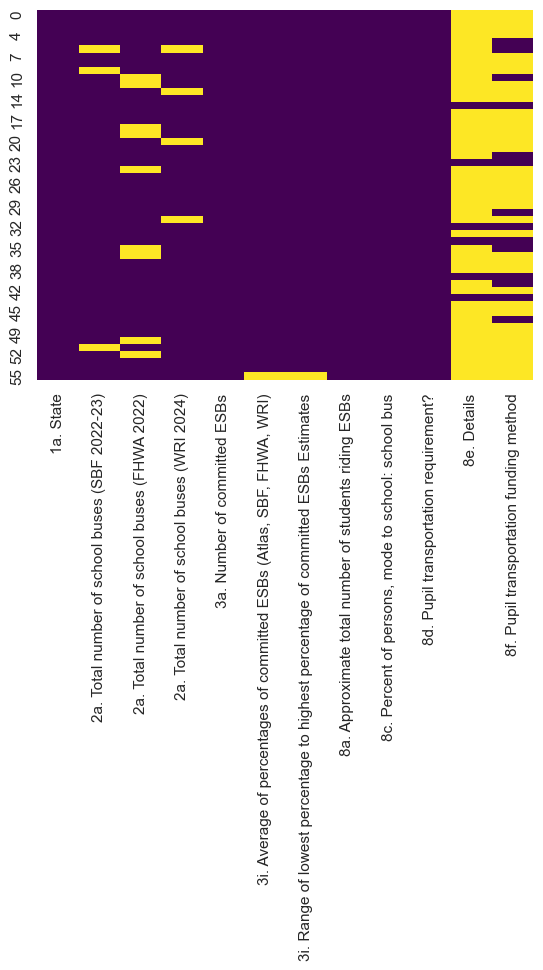

In [42]:
sns.heatmap(state_df.isnull(),cbar=False, cmap="viridis")


<Axes: >

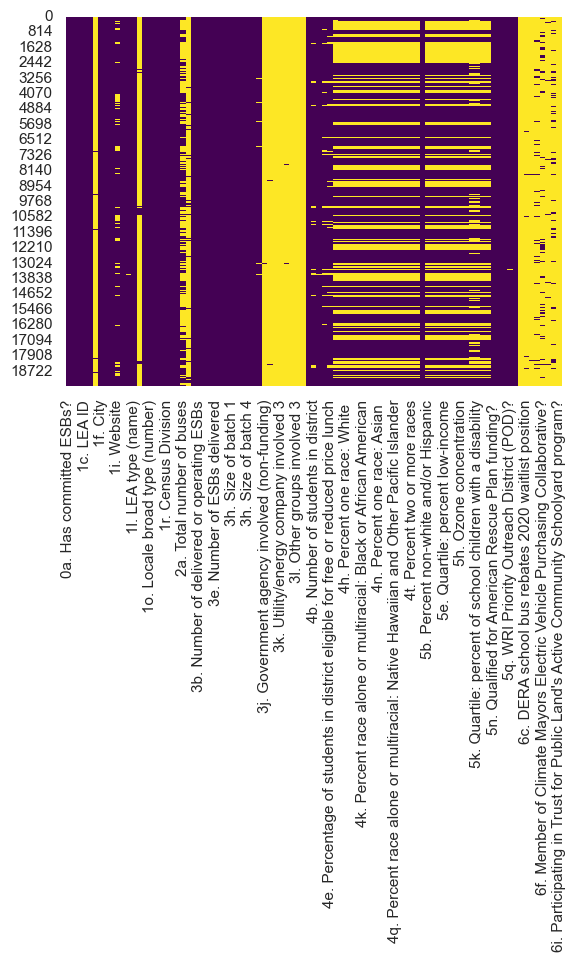

In [43]:
sns.heatmap(district_df.isnull(),cbar=False, cmap="viridis")


In [44]:
drop_columns = [col for col in district_df.columns if ((district_df.isnull().sum()/district_df.shape[0])>0.8)[col]]
drop_columns

['1e. Street address 2',
 '1m. Supervisory union LEA ID',
 '2b. Contractor used for some or all of buses?',
 '3j. Government agency involved (non-funding)',
 '3k. Utility/energy company involved 1',
 '3k. Utility/energy company involved 2',
 '3k. Utility/energy company involved 3',
 '3l. Other groups involved 1',
 '3l. Other groups involved 2',
 '3l. Other groups involved 3',
 '3m. Other notes',
 '6b. ARP 2021 waitlist position',
 '6c. DERA school bus rebates 2020 waitlist position',
 '6d. DERA school bus rebates 2021 waitlist position',
 '6e. Applied for ESB funding but not awarded',
 '6f. Member of Climate Mayors Electric Vehicle Purchasing Collaborative?',
 '6g. School district sustainability commitment',
 '6h. District contains Generation180 Solar School?',
 "6i. Participating in Trust for Public Land's Active Community Schoolyard program?"]

In [45]:
district_df = district_df.drop(columns=drop_columns, axis=1)

In [46]:
[col for col in district_df.columns if ((district_df.isnull().sum()/district_df.shape[0])>0)[col]]

['1d. Street address 1',
 '1f. City',
 '1h. ZIP code',
 '1i. Website',
 '1k. LEA type (number)',
 '1n. Locale (full number)',
 '1q. Census Region',
 '1r. Census Division',
 '2a. Total number of buses',
 '3i. Percent of fleet that is electric',
 '4b. Number of students in district',
 '4c. Number of schools in district',
 '4d. Percentage of schools in district that are Title I schoolwide eligible',
 '4e. Percentage of students in district eligible for free or reduced price lunch',
 '4f. Median household income',
 '4g. Percent of population below the poverty level',
 '4h. Percent one race: White ',
 '4i. Percent race alone or multiracial: White',
 '4j. Percent one race: Black or African American ',
 '4k. Percent race alone or multiracial: Black or African American',
 '4l. Percent one race: American Indian and Alaska Native ',
 '4m. Percent race alone or multiracial: American Indian and Alaska Native',
 '4n. Percent one race: Asian ',
 '4o. Percent race alone or multiracial: Asian',
 '4p. 

In [47]:
district_df["1s. Latitude"] = district_df["1s. Latitude"].astype(float)
district_df["1t. Longitude "] = district_df["1t. Longitude "].astype(float)

<Axes: >

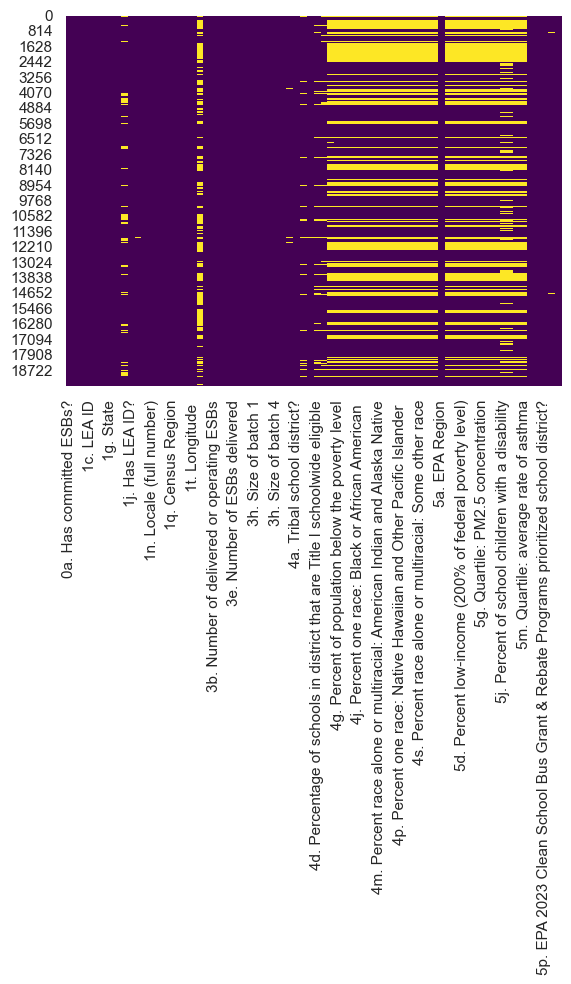

In [48]:
sns.heatmap(district_df.isnull(), cbar=False, cmap="viridis")


# Data Visualization

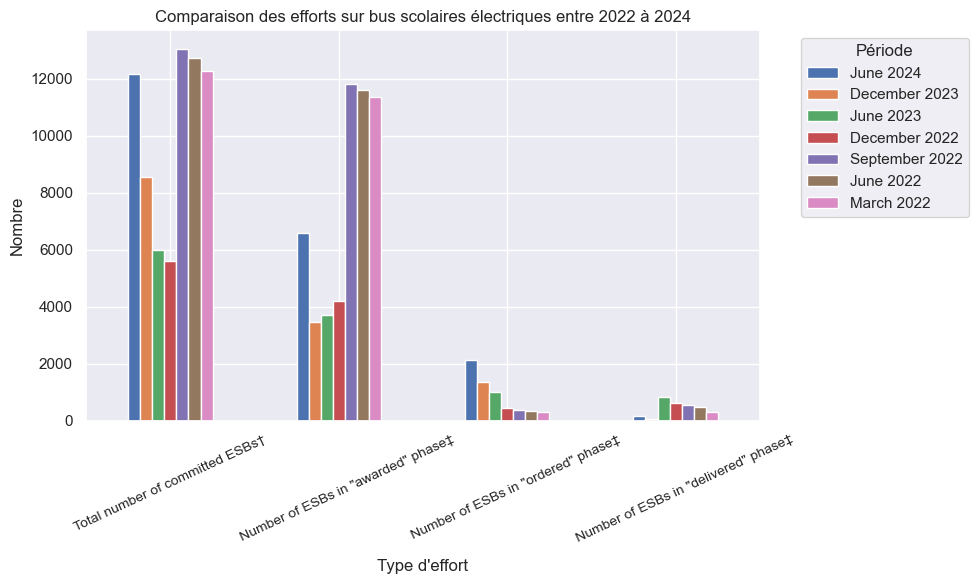

In [49]:
# Sélectionner les 4 premières observations
subset = stats_df.head(4)

# Choisir quelques colonnes numériques pertinentes à visualiser
cols_to_plot = [
    "June 2024",	"December 2023",	"June 2023",	"December 2022",	"September 2022",	"June 2022",	"March 2022"
]

# Tracer le graphique
subset.set_index('Value')[cols_to_plot].plot(kind='bar', figsize=(10,6))
plt.xlabel("Type d'effort")
plt.ylabel("Nombre")
plt.title("Comparaison des efforts sur bus scolaires électriques entre 2022 à 2024")
plt.xticks(rotation=25, size=10)
plt.legend(title="Période", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [50]:


fig = px.scatter(
    state_df,
    x="2a. Total number of school buses (SBF 2022-23)",
    y="3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)",
    size="8a. Approximate total number of students riding ESBs",
    color="1a. State",
    hover_name="1a. State",
    size_max=60,
    labels={
        "2a. Total number of school buses (SBF 2022-23)": "Total School Buses",
        "3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)": "Avg % ESB Adoption",
        "8a. Approximate total number of students riding ESBs": "Students Riding ESBs"
    },
    title="Adoption of ESBs by State: % Adoption, and Students Impacted"
)
fig.update_layout(showlegend=False)
fig.show()


In [51]:
# Use column names of df for the different parameters x, y, color, ...
fig = px.scatter(state_df, x="8c. Percent of persons, mode to school: school bus", y="1a. State", color="8d. Pupil transportation requirement?",
                 title="Bus Adoption Disparity Between States",
                 labels={"8c. Percent of persons, mode to school: school bus": "Bus Adoption Rate",
                         "1a. State": "State",
                         "8d. Pupil transportation requirement?": "Pupil Transportation Requirement"},)
fig.update_layout( height=1000, width=1500)

fig.show()

C:\Users\tanto\AppData\Local\Temp\ipykernel_15732\1027014517.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




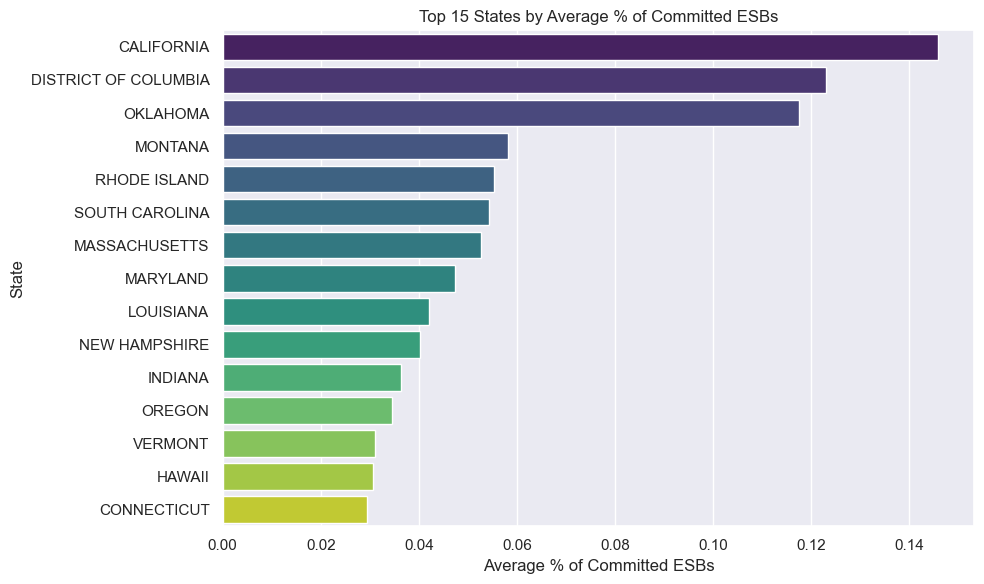

In [52]:
top_states = state_df[['1a. State', '3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)']].dropna()
top_states = top_states.sort_values('3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_states,
    x='3i. Average of percentages of committed ESBs (Atlas, SBF, FHWA, WRI)',
    y='1a. State',
    palette='viridis'
)
plt.xlabel('Average % of Committed ESBs')
plt.ylabel('State')
plt.title('Top 15 States by Average % of Committed ESBs')
plt.tight_layout()
plt.show()

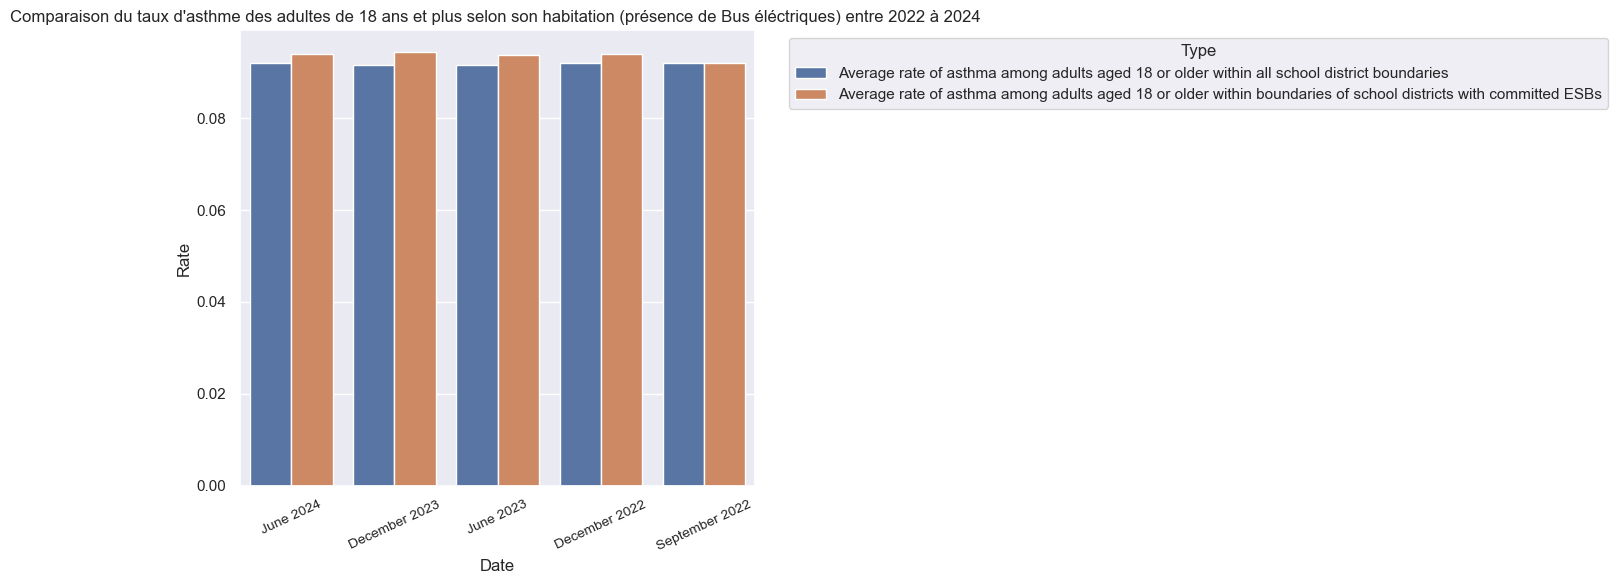

In [53]:
# Préparer les données pour un grouped barplot seaborn
subset = stats_df.iloc[20:22,:6]
cols_to_plot1 = [
    "June 2024",	"December 2023",	"June 2023",	"December 2022",	"September 2022"
]

subset_melted = subset.melt(id_vars='Value', value_vars=cols_to_plot1, var_name='Date', value_name='Rate')
subset_melted['Rate'] = pd.to_numeric(subset_melted['Rate'], errors='coerce')

plt.figure(figsize=(15,6))
sns.barplot(data=subset_melted, x='Date', y='Rate', hue='Value')
plt.ylabel("Rate")
plt.title("Comparaison du taux d'asthme des adultes de 18 ans et plus selon son habitation (présence de Bus éléctriques) entre 2022 à 2024 ")
plt.xticks(rotation=25, size=10)
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
subset = stats_df.iloc[6:22,:]
subset

,Value,June 2024,December 2023,June 2023,December 2022,September 2022,June 2022,March 2022,December 2021,June 2021
6,Total number of districts with committed ESBs,NaN,1132,914,895,483,455,415,354.000000,258.0
7,Number of school districts or entities wi...,NaN,704,346,279,266,243,201,NaN,NaN
8,Total number of states or territories with com...,NaN,54,54,55,39,38,38,36.000000,33.0
9,"Average time taken for ESB to move from ""Award...",16,16,16,17,16,15,16,NaN,NaN
10,Average % non-white and/or Hispanic population...,0.234,0.234481,0.23083,0.22011,0.22011,0.220153,0.218633,NaN,NaN
11,Average % non-white and/or Hispanic population...,0.35,0.378046,0.369613,0.356037,0.440273,0.444906,0.428549,NaN,NaN
12,Average % low-income population within all sch...,0.283,0.283272,0.281616,0.305299,0.305299,0.30521,0.329316,NaN,NaN
13,Average % low-income population within boundar...,0.302,0.311548,0.306135,0.337932,0.312289,0.311895,0.323177,NaN,NaN
14,Average % children with disabilities within al...,0.059,0.05896,0.058548,0.058548,0.058548,0.057599,0.057622,0.057622,NaN
15,Average % children with disabilities within bo...,0.06,0.058921,0.057879,0.058323,0.051993,0.049762,0.05025,0.050081,NaN


In [55]:
# time taken to move from Awarded to operating buses

df = subset.iloc[3,1:][::-1][2:]
fig = px.line(x=df.index, y=df.values)
fig.add_trace(go.Scatter(x=df.index, y=df.values, name="Adoption Rate", mode='lines+markers'))
fig.update_layout(
    title="Time taken to move from Awarded to operating buses",
    xaxis_title="Date",
    yaxis_title="Time (months)",
    showlegend=False
)
fig.show()



In [56]:


def plot_two_panel_adoption(subset, i, title="Adoption Over Time (0% to 100%)",name1="Graph1", name2="Graph2"):
    """
    Affiche 4 courbes sur 2 subplots verticaux à partir du DataFrame subset.
    
    Paramètres :
        subset : pd.DataFrame — le DataFrame contenant les données
        i : int — l’index de départ (utilisera les lignes i à i+3)
        height : int — hauteur de la figure en pixels
        width : int — largeur de la figure en pixels
    """
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=[name1, name2])
    # Ligne du haut (row=1)
    for j in range(2):
        df = subset.iloc[i + j, 1:][::-1][2:]
        fig.add_trace(go.Scatter(x=df.index, y=df.values,
                                 mode='lines+markers',
                                 name=subset.iloc[i + j, 0]),
                      row=1, col=1)

    # Ligne du bas (row=2)
    for j in range(2, 4):
        df = subset.iloc[i + j, 1:][::-1][2:]
        fig.add_trace(go.Scatter(x=df.index, y=df.values,
                                 mode='lines+markers',
                                 name=subset.iloc[i + j, 0]),
                      row=2, col=1)

    # Mise en page
    fig.update_layout(
        title_text=title
    )

    fig.show()


In [57]:
plot_two_panel_adoption(subset, 0, title="Adoption Over Time")
plot_two_panel_adoption(subset, 4, title="% 'non-white and/or Hispanic' and low-income population Over Time", name1="non-white and/or Hispanic population", \
                        name2="low-income population")
plot_two_panel_adoption(subset, 8, title="% Children with disabilities and PM 2.5 Concentration Over Time", name1="% Children with disabilities", \
                        name2="% PM 2.5 Concentration")


In [58]:

fig = px.scatter_map(
    district_df,
    lat="1s. Latitude",
    lon="1t. Longitude ",
    color="2a. Total number of buses",
    range_color=(0, 1000),              
    zoom=3,
    height=300
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


In [59]:

fig = px.box(bus_df,x="1a. State", y="3ae. Dollar amount toward charger",
            color="3n. Current status of bus", 
            )
fig.update_traces(quartilemethod="exclusive",) 
fig.show()

Text(0.5, 0, 'State')

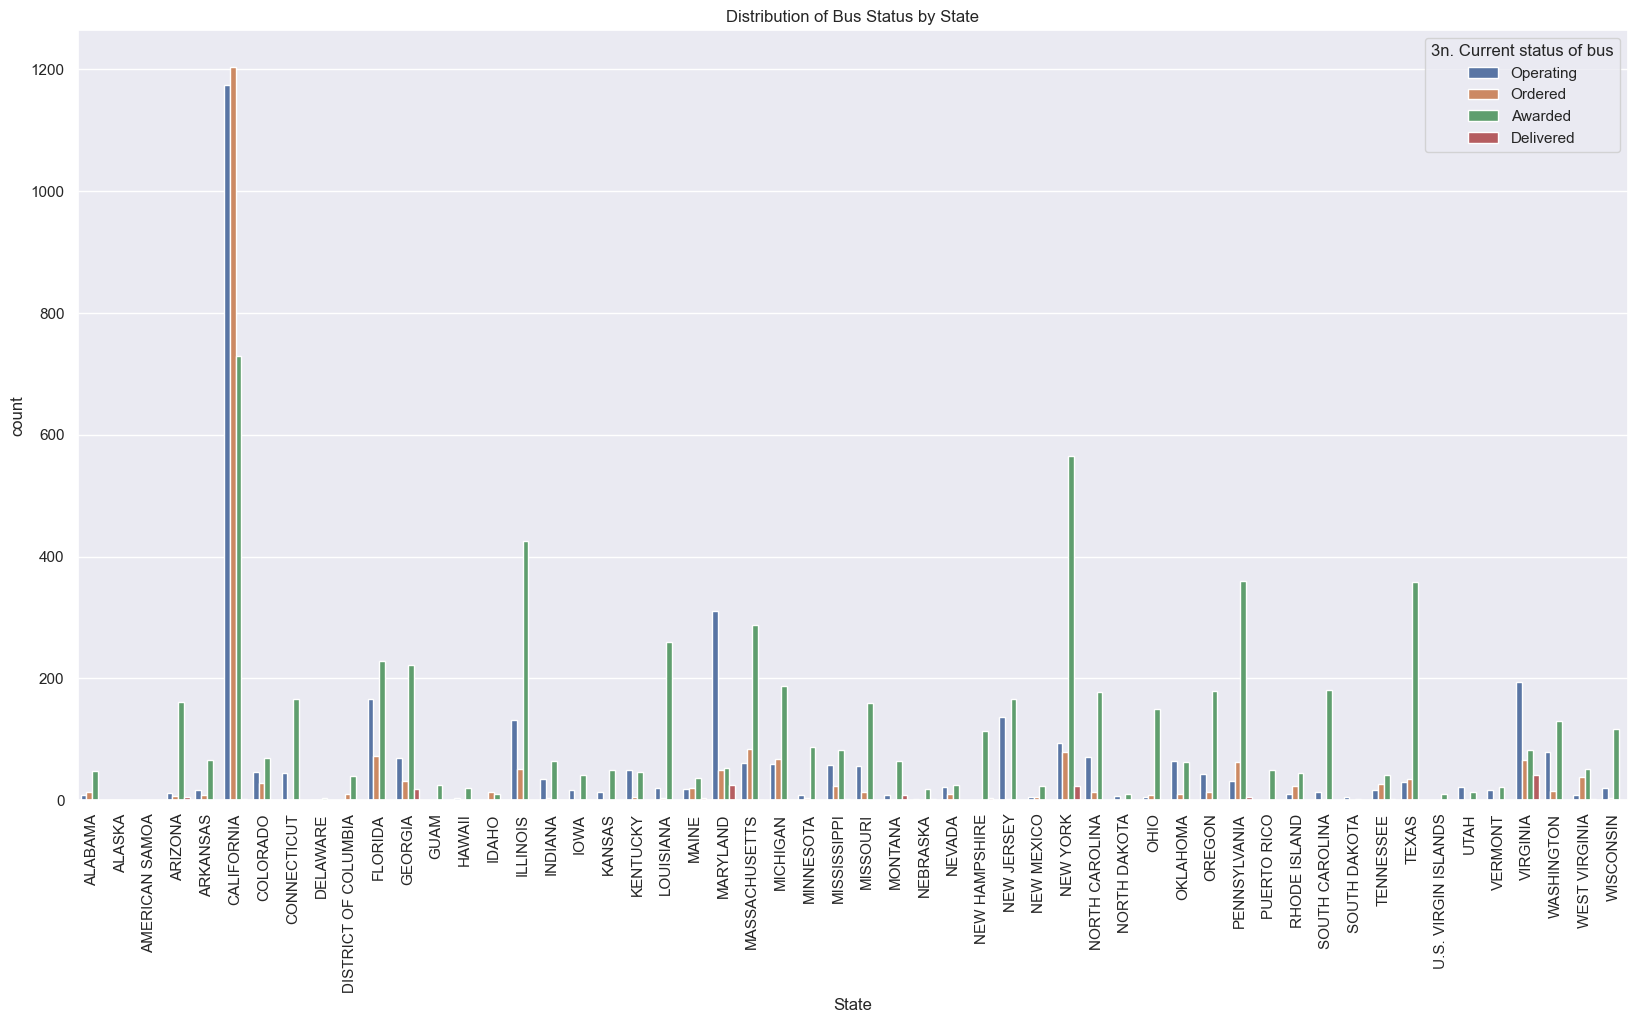

In [60]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(bus_df, x="1a. State", hue="3n. Current status of bus")
plt.title("Distribution of Bus Status by State")
plt.xlabel("State")